# Practicing loss functions and regression metrics

Below you will practice looking at loss functions and look at regression metrics related to these loss functions.

---

## 1. Load packages

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

---

## 2. Plotting functions

Here are the functions from the presentation to make visualizing your regressions easier:

In [30]:
def plot_regression(x, y, model):
    plt.figure(figsize=(10,8))
    axes = plt.gca()
    
    intercept = model.params[0]
    slope = model.params[1]

    for x_, y_ in zip(x, y):    
        plt.plot((x_, x_), (y_, x_*slope + intercept),
                 'k-', ls='dashed', lw=1)
        
    plt.scatter(x, y, s=70, c='steelblue')
    
    x_points = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)
    
    regline_x = x_points
    regline_y = x_points*slope + intercept

    plt.plot(regline_x, regline_y, c='darkred', lw=3.5)

    plt.show()
    
    
def plot_leastsq_loss(model):
    plt.figure(figsize=(10,8))
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    for r in resids:
        plt.plot((r, r), (0, r**2), 'k-', ls='dashed', lw=2)
        
    plt.plot(resid_points, resid_points**2, c='gold', alpha=0.7)
    

def plot_residuals_ladloss(model):
    
    resids = model.resid
    
    resid_lim = np.max([abs(np.min(resids)), abs(np.max(resids))]) + 1
    
    resid_points = np.linspace(-1*resid_lim, resid_lim, 200)
    
    plt.figure(figsize=(10,8))
    
    for r in resids:
        
        plt.plot((r, r), (0, abs(r)), 'k-', ls='dashed', lw=1)
        
    plt.plot(resid_points, np.abs(resid_points), c='gold', alpha=0.7)
    


---

## 3. Load in the data from project 3

Load your data from project 3. Below is the small version I put in datasets, but if you've worked on it and have it cleaned you may want to load your version instead.

In [3]:
# here is the small version i put in your datasets folder:
iowa = pd.read_csv('/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv')

---

## 4. Choose a continuous response variable and predictor variable from the dataset

If you choose columns with dollar amounts, you will need to remove the dollar signs!

In [10]:
iowa.shape

(270955, 18)

In [4]:
iowa.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [5]:

def clean_cash(col):
    try:
        new_col = float(col.replace('$',''))
    except:
        new_col = np.nan
    return new_col

iowa['State Bottle Retail'] = iowa['State Bottle Retail'].apply(clean_cash)

In [7]:
iowa.rename(columns={'State Bottle Retail': 'bottle_retail','Bottles Sold':'bottles_sold' }, inplace=True)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,bottle_retail,bottles_sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,14.25,6,$85.50,10.5,2.77


In [ ]:
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
y = combine['bottles_sold']     # predict this
x = combine[['bottle_retail']]  # from this


---

## 5. Choose a small subset of the predictor and response variables you chose

You can use the ```np.random.choice()``` function to get a random sample of indices. Look up how to use it!

In [13]:
#sample = iowa[['bottles_sold','bottle_retail']]

sample = iowa.sample(frac=.05)
sample.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,bottle_retail,bottles_sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
167343,05/20/2015,4676,SIOUX CITY,51101,97.0,Woodbury,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35,43031,Bacardi Gold Rum Mini,500,$5.54,8.31,12,$99.72,6.0,1.59
246248,01/26/2015,2591,ATLANTIC,50022,15.0,Cass,1022100.0,TEQUILA,85,87586,El Jimador Silver Tequila,750,$11.15,16.73,2,$33.46,1.5,0.40


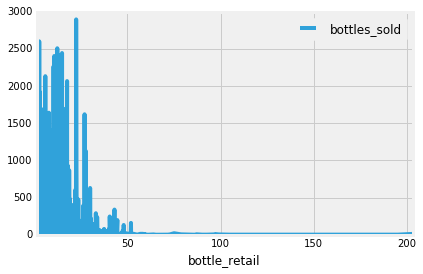

In [26]:
sample.groupby(['bottle_retail'])[['bottles_sold']].sum().plot()

---

## 6. Build a least squares regression model predicting your response from your predictors

For this one use statsmodels rather than sklearn.

I did not provide the code to create the regression. Either look it up in the statsmodels documentation or refer to the slides so you can practice doing this yourself.

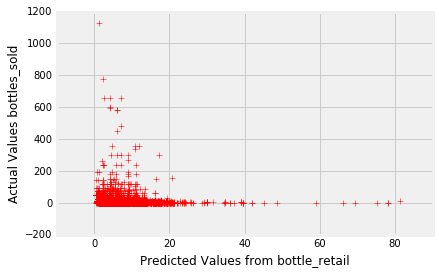

In [28]:
import statsmodels.api as sm

y = sample['bottles_sold']     # predict this
x = sample[['bottle_retail']]  # from this

# Note the difference in argument order; y and x are reversed;
model = sm.OLS(y, x).fit() # initializing and fitting in one step
predictions = model.predict(x)

# Plot the model
fig,ax = plt.subplots(figsize=(12,8))
figplt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)

plt.xlabel("Predicted Values from bottle_retail")
plt.ylabel("Actual Values bottles_sold")
plt.show()

---

## 7. Plot the least squares regression

You can use the ```plot_regression(x, y, model)``` function provided.

In [33]:
plot_regression(x, y, model)

---

## 8. Build a least absolute deviation quantreg model on the same sample

---

## 9. Plot the LAD regression

---

## 10. Calculate the RMSE and the MAE between you response and predicted response

**RMSE** is the **root mean squared error**. It is a metric for the performance of your regression related to the least squared loss. 

$$\text{RMSE} = \sqrt{\frac{\sum_{i}{\left(\hat{y}_i - y_i \right)^2}}{n}}$$

https://en.wikipedia.org/wiki/Root-mean-square_deviation

**MAE** is the **mean absolute error**. It is a metric for regression performace when the loss function is the least absolute deviation.

$$\text{MAE} = \frac{\sum_{i}{|\hat{y}_i - y_i |}}{n}$$

https://en.wikipedia.org/wiki/Average_absolute_deviation

In [4]:
## RMSE:

In [5]:
## MAE:

---

## 11. [Challenge] What would be the loss function to find the _mode_ and why?

Remember that the least squares loss minimizes:

### $$\sum_{i}{\left(\hat{y}_i - y_i \right)^2}$$

And the least absolute deviation loss minimizes:

### $$y = \sum_{i}{|\hat{y}_i - y_i |^1}$$

**Do you see a pattern here?**


In [6]:
#

---

## 12. Create a quantile regression with q = 0.25 and plot it. What exactly is this regression predicting?